# Weight Loss Plot

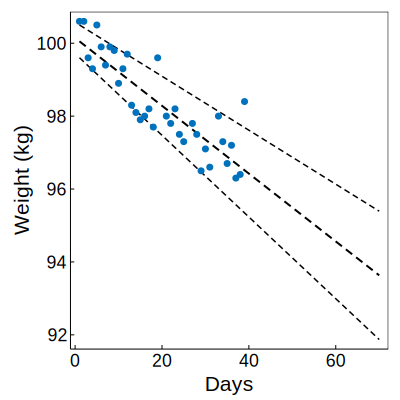

Best Estimate of Weight Loss Rate: -0.65 kg/week
95% Confidence Interval:(-0.78, -0.52) kg/week


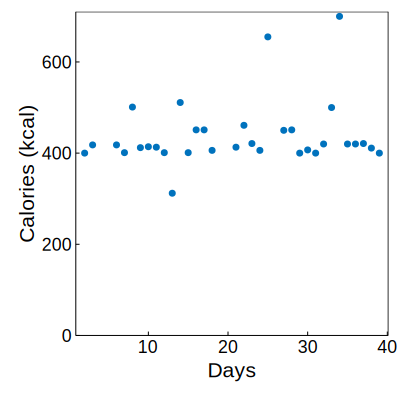

In [1]:
using Plots
using LaTeXStrings
using Dates
using LsqFit

MColor = ["#0072BD", "#D95319", "#EDB120", "#7E2F8E", "#77AC30", "#4DBEEE"]


#Provide Data for Weights and Calories
include("./MyWeights.jl")

#Line of Best Fit
@. model(x, p) = p[1] + p[2]*x
p0 = [101.6, -0.5]
fit = curve_fit(model, Weights[:,1], Weights[:,2], p0)


#Target weight loss (0.5 kg/week)
Days_Linear = LinRange(1,70,100)
Target_Weight = Days_Linear*(-0.5/7) .+ 100.6
Target_Weight_2 = Days_Linear*(-1/7) .+ 100.6
#scatter!(Calories[:,1], Calories[:,2], color = MColor[2], markerstrokealpha = 0.0)
#plot!(Days_Linear, Target_Weight, color = :black, ls = :dash, lw = 1.5, label = "")
plot(Days_Linear, day -> model(day, coef(fit)), color = :black, lw = 2, ls = :dash, label = "")
plot!(Days_Linear, day -> model(day, [confidence_interval(fit)[1][1], confidence_interval(fit)[2][1]]), color = :black, lw = 1.5, ls = :dash, label = "")
plot!(Days_Linear, day -> model(day, [confidence_interval(fit)[1][2], confidence_interval(fit)[2][2]]), color = :black, lw = 1.5, ls = :dash, label = "")
#display(plot!(Days_Linear, Target_Weight_2, color = :black, ls = :dash, lw = 1.5,
display(scatter!(Weights[:,1], Weights[:,2], color = MColor[1], label = "", markerstrokewidth = 0.0,
    xlabel = "Days",
    ylabel = "Weight (kg)",  
    size = (400,400), 
    framestyle=:box, 
    tickfont = font(12, "serif-roman"), 
    fontfamily = "serif-roman", 
    guidefontsize = 14, 
    grid=false))

    
println("Best Estimate of Weight Loss Rate: ", round(coef(fit)[2]*7, sigdigits = 2), " kg/week")
println("95% Confidence Interval:", round.(confidence_interval(fit)[2].*7, sigdigits = 2), " kg/week")
scatter(Calories[:,1], Calories[:,2], color = MColor[1], label = "", markerstrokewidth = 0.0,
    xlabel = "Days",
    ylabel = "Calories (kcal)",  
    size = (400,400), 
    framestyle=:box, 
    ylims = (0, 710),
    tickfont = font(12, "serif-roman"), 
    fontfamily = "serif-roman", 
    guidefontsize = 14, 
    grid=false)